<a href="https://www.kaggle.com/code/tonysiu/lab-extra-credit-002-siu?scriptVersionId=127088817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Lab: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph.

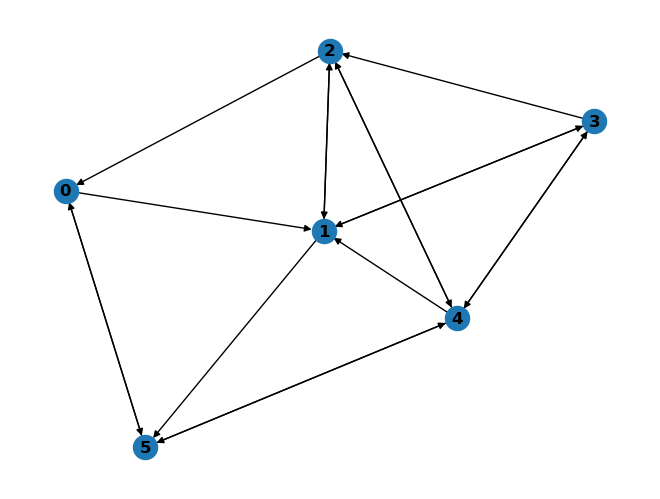

#nodes: 6, #edges: 17
node-0, #in_degrees 2, #out_degrees 2
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 3, #out_degrees 4
node-5, #in_degrees 3, #out_degrees 2
[[0 1 0 0 0 1]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [1 0 0 0 1 0]]


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 1],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [1, 0, 0, 0, 1, 0]])

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [2]:
import numpy as np

# your code to get the transition matrix M

def transition(
    adj:np.ndarray
)->np.ndarray:
    return adj / np.sum((adj > 0).astype(np.uint8),axis=0)

tr = transition(Adj)
tr[:,:-1]

matrix([[0.        , 0.25      , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.5       , 0.        ],
        [0.5       , 0.25      , 0.        , 0.        , 0.33333333],
        [0.        , 0.25      , 0.33333333, 0.        , 0.33333333],
        [0.        , 0.25      , 0.33333333, 0.5       , 0.        ],
        [0.5       , 0.        , 0.        , 0.        , 0.33333333]])

In [3]:
m = np.array([
    [1,1,0],
    [1,0,1],
    [0,1,0]
])
m = transition(m)
r = np.array([1/3]*3).reshape(-1,1)
for i in range(4):
    r = m.dot(r)
    print(r)

[[0.33333333]
 [0.5       ]
 [0.16666667]]
[[0.41666667]
 [0.33333333]
 [0.25      ]]
[[0.375     ]
 [0.45833333]
 [0.16666667]]
[[0.41666667]
 [0.35416667]
 [0.22916667]]


## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$

In [4]:
# your code
e = 0.001

r_cur = r_prev = np.array([1/6]*6).reshape(-1,1)
m = transition(Adj)
r_cur = m.dot(r_prev)

while np.abs(r_cur - r_prev).sum() > e:
    r_prev = r_cur
    r_cur = m.dot(r_prev)
    
print(r_cur)


[[0.08922589]
 [0.19107865]
 [0.17193665]
 [0.18474351]
 [0.2388704 ]
 [0.1241449 ]]
